# BUILDING THE TRAINED MODEL

DATA PREPROCESSING

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('../dataset/train_dataset.csv', index_col = 0)

In [3]:
dataset.head()

,trans_hour,trans_day,trans_month,trans_year,category,card_number,age,trans_amount,state,zip,fraud_risk
0,0,1,1,2019,12,6.300000e+11,54,66.21,22,49879,0
1,1,1,1,2019,3,3.540000e+15,15,55.81,14,62668,0
2,3,1,1,2019,8,5.020000e+11,60,8.68,4,96037,0
3,6,1,1,2019,4,3.530000e+15,44,89.52,40,29911,0
4,6,1,1,2019,0,2.350000e+15,72,1.90,38,16421,0


In [4]:
import numpy as np

In [5]:
x = dataset.iloc[ : , : 10].values
y = dataset.iloc[ : , 10].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [8]:
x_train.shape

(10210, 10)

In [9]:
x_test.shape

(1802, 10)

In [10]:
fraud = np.count_nonzero(y_train == 1)
valid = np.count_nonzero(y_train == 0)

In [11]:
print('Fraud cases in training data =', fraud)
print('Valid cases in training data =', valid)

Fraud cases in training data = 5106
Valid cases in training data = 5104


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
x_train[ : 5]

array([[ 0.66337259,  1.24104545,  0.45653094, -0.37826057,  0.83408097,
        -0.30554032,  2.3966382 , -0.73068363,  0.0181697 , -0.77660466],
       [-1.6023747 , -0.07304053, -0.90455674, -0.37826057, -1.22335066,
        -0.30836573,  0.74498916, -0.74861649,  0.64443135,  0.93890762],
       [-1.12537527,  0.1459738 ,  0.45653094, -0.37826057,  0.57690202,
        -0.30362247,  1.18542891, -0.79511806,  0.78360061, -1.2179066 ],
       [-1.6023747 , -0.29205486, -0.36012167, -0.37826057, -0.70899275,
        -0.30397763,  1.46070375, -0.51118115, -1.58227676,  1.76478537],
       [-0.7676257 , -0.29205486, -1.44899181, -0.37826057, -0.70899275,
        -0.30836532, -0.08083536,  0.02559291,  0.78360061, -1.18526965]])

In [15]:
x_test[ : 5]

array([[ 1.02112216, -0.51106919,  1.27318354, -0.37826057,  1.34843888,
         3.15638262,  0.35960438,  1.60624238,  0.64443135,  0.91726066],
       [-0.05212655,  0.58400246,  0.1843134 , -0.37826057,  0.83408097,
        -0.30822372, -0.08083536, -0.65192446,  0.29650821, -1.52769864],
       [ 1.14037202,  1.56956694,  0.72874847, -0.37826057,  1.09125992,
        -0.30560345,  1.29553884,  1.71351642,  1.13152375,  1.07356281],
       [ 1.02112216, -0.73008352,  0.1843134 , -0.37826057,  1.09125992,
        -0.30500363,  1.51575871,  1.6205402 ,  0.15733896,  0.77172649],
       [-1.6023747 , -0.07304053, -0.08790413, -0.37826057,  1.34843888,
        -0.30819767,  0.80004413, -0.06571388, -0.60809196,  0.84854544]])

LOGISTIC REGRESSION (LR)

In [16]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred = LR_model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
acc_lr = accuracy_score(y_test, y_pred)

In [20]:
print(acc_lr)

0.8485016648168702


K-NEAREST NEIGHBORS (KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = KNN_model.predict(x_test)

In [23]:
acc_knn = accuracy_score(y_test, y_pred)

In [24]:
print(acc_knn)

0.8657047724750278


SUPPORT VECTOR MACHINE (SVM)

In [25]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0)
SVM_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
y_pred = SVM_model.predict(x_test)

In [27]:
acc_svm = accuracy_score(y_test, y_pred)

In [28]:
print(acc_svm)

0.8479467258601554


NAIVE BAYES (NB)

In [29]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [30]:
y_pred = NB_model.predict(x_test)

In [31]:
acc_nb = accuracy_score(y_test, y_pred)

In [32]:
print(acc_nb)

0.8496115427302997


DECISION TREE (DT)

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
y_pred = DT_model.predict(x_test)

In [35]:
acc_dt = accuracy_score(y_test, y_pred)

In [36]:
print(acc_dt)

0.967258601553829


RANDOM FOREST (RF)

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
y_pred = RF_model.predict(x_test)

In [39]:
acc_rf = accuracy_score(y_test, y_pred)

In [40]:
print(acc_rf)

0.9700332963374029


ARTIFICIAL NEURAL NETWORK (ANN)

In [41]:
import tensorflow as tf

In [42]:
tf.__version__

'2.9.0'

In [43]:
ANN_model = tf.keras.models.Sequential()

In [44]:
ANN_model.add(tf.keras.layers.Dense(64, input_dim = 10, activation = 'relu'))
ANN_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
ANN_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [45]:
ANN_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
ANN_model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
320/320 [==============================] - 3s 6ms/step - loss: 0.3978 - accuracy: 0.8330
Epoch 2/200
320/320 [==============================] - 2s 5ms/step - loss: 0.3204 - accuracy: 0.8534
Epoch 3/200
320/320 [==============================] - 1s 4ms/step - loss: 0.3048 - accuracy: 0.8604
Epoch 4/200
320/320 [==============================] - 1s 4ms/step - loss: 0.2951 - accuracy: 0.8655
Epoch 5/200
320/320 [==============================] - 1s 5ms/step - loss: 0.2879 - accuracy: 0.8696
Epoch 6/200
320/320 [==============================] - 2s 6ms/step - loss: 0.2802 - accuracy: 0.8747
Epoch 7/200
320/320 [==============================] - 2s 5ms/step - loss: 0.2730 - accuracy: 0.8760
Epoch 8/200
320/320 [==============================] - 1s 3ms/step - loss: 0.2627 - accuracy: 0.8850
Epoch 9/200
320/320 [==============================] - 1s 3ms/step - loss: 0.2543 - accuracy: 0.8928
Epoch 10/200
320/320 [==============================] - 1s 4ms/step - loss: 0.2460 - accura

In [47]:
loss, acc_ann = ANN_model.evaluate(x_train, y_train, verbose = 0)

In [48]:
print(acc_ann)

0.9942213296890259


In [49]:
y_pred = ANN_model.predict(x_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

57/57 [==============================] - 0s 3ms/step


ACCURACY COMPARISON OF ALL THE MODELS

In [50]:
scores = [acc_lr * 100,
          acc_knn * 100,
          acc_svm * 100,
          acc_nb * 100,
          acc_dt * 100,
          acc_rf * 100,
          acc_ann * 100]

In [51]:
names = ["Logistic Regression",
        "K-Nearest Neighbors",
        "Support Vector Machine",
        "Naive Bayes",
        "Decision Tree",
        "Random Forest",
        "Artificial Neural Network"]

In [52]:
df = pd.DataFrame()
df['Algorithm Name'] = names
df['Accuracy Score (%)'] = scores
df = df.sort_values('Accuracy Score (%)', ascending = False)

In [53]:
df

,Algorithm Name,Accuracy Score (%)
6,Artificial Neural Network,99.422133
5,Random Forest,97.003330
4,Decision Tree,96.725860
1,K-Nearest Neighbors,86.570477
3,Naive Bayes,84.961154
0,Logistic Regression,84.850166
2,Support Vector Machine,84.794673


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

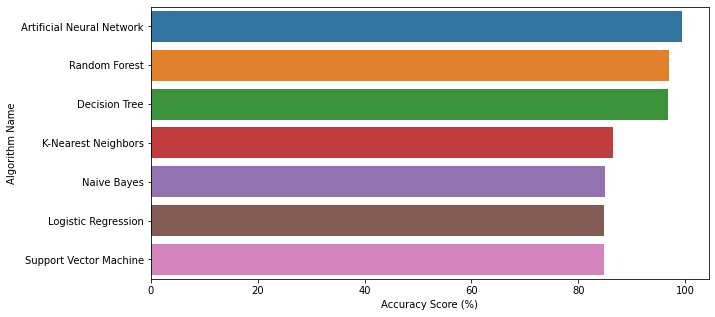

In [55]:
fig = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = "Accuracy Score (%)", y = "Algorithm Name", data = df)

SAVING THE BEST TRAINED MODEL

In [56]:
import os.path

In [57]:
if os.path.isfile('../model/project_model.h5') is False:
    ANN_model.save('../model/project_model.h5')